**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# *Using Arficial Neural Networks for genre classification* 

## Abstract

In recent years, artificial neural networks have become increasingly popular in many applications. In this paper, musical genre classification performance is studied for different multi-layer artificial neural networks. Different preprocessing methods, hyperparameters and activation and loss functions were compared. Further, the general performance was evaluated. In this application, ReLu based activation functions performed the best. Moreover, rather simple preprocessing yielded the best results. The optimal NN classifier also performed significantly better than a statistical guess, having approximately a 67% accuracy rate, in comparison with the 49% of guessing the most common genre. These findings are in line with the recent literature, where multi-layer networks have been successfully used in a wide variety of classification applications, ReLU, and its variants being preferable for many purposes.

## 1. Introduction
This report introduces a complete machine learning solution for a genre classification problem. The aim is to develop a solution that is capable to classify a song into one of the ten given genres based on given features abstracted from an audio strip. Such a model has several applications. For example, the solution can be used in music streaming services like Apple Music, Spotify, and YouTube Music to enhance the user experience. These services provide suggestions for users based on their previous listening history and given preference data. The most fundamental solution behind this feature is to be able to find similar songs i.e. classify them. Thus, the task showcased in this report is extremely relevant.

By completing the project, we aim for serveral learning outcomes. First of all, the project will give us an overal perspective on addressing a practical machine learning problem. We will also become more familiar with methods need in project, such as dimensional reduction, classification and neural networks. Finally, completing the project as pair work, will teach teamwork and collaboration skills in a context of highly technical project.

The contents of the report are the following. First the problem is introduced. Then, the dataset is explained and visualized in the data-analysis section. Then, the methods and results given. Finally, we summarize the the result and suggest areas for future studies.


### The problem
The task in hand is to develop predictors h(x) for each genre, which maps each feature vector into a probability that the genre is Y. Now the predictors give for each feature vector probabilities for each genre. The genre with the highest probability is the predicted label for the song. The 10 available label options are:
    1. 'Pop_Rock'
    2. 'Electronic'
    3. 'Rap' 
    4. 'Jazz' 
    5. 'Latin' 
    6. 'RnB' 
    7. 'International'
    8. 'Country'
    9. 'Reggae'
    10. 'Blues' 

### Evaluation
The performance of the solution is evaluated with the log loss method and the accuracy of predictions. The log loss gives a more sophisticated view into the performance of a model compared to pure accuracy [[2](http://wiki.fast.ai/index.php/Log_Loss)]. For example, log loss penalizes highly from giving a low probability to a genre that turned out to be correct.

## 2. Data analysis

The data set consits of 4363 songs, which are originally from The Milion Song Dataset [[1](https://labrosa.ee.columbia.edu/millionsong/)]. Each song has 264 precalculated features, which consist of certain statistics about rhythm, pitch and timbre of a song. The rhythm is described with patterns in 24 bands, pitch with chroma in 12 pitch classes and timbre with 12 Mel Frequency Cepstral Coefficients (MFCCs).

![Describtion of feature vector](https://github.com/MasaSip/mlbp-genre-classification/blob/master/report/feature_vector.PNG?raw=true)
*Figure 1. The sturcture of a feature vector*


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
# Load the data and cleanup
data_df = pd.read_csv('train_data.csv',header=None)
data = np.asarray(data_df)
labels_df = pd.read_csv('train_labels.csv',header=None)
labels = np.asarray(labels_df)

### 2.1. Class distribution

,Genre,Label,# of occurences,% of songs
0,Pop_Rock,1,2178,49.9
1,Electronic,2,618,14.2
2,Rap,3,326,7.5
3,Jazz,4,253,5.8
4,Latin,5,214,4.9
5,RnB,6,260,6.0
6,International,7,141,3.2
7,Country,8,195,4.5
8,Reggae,9,92,2.1
9,Blues,10,86,2.0


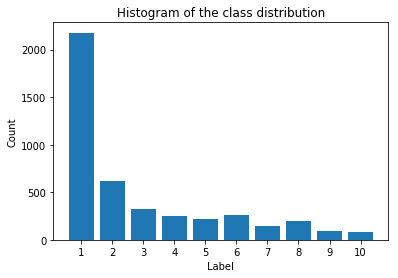

In [4]:
# Display the distribution of labels
counts = np.zeros(10)
label_values = np.asarray(range(1,11))
for i in range(10):
    counts[i] = sum(labels == i+1)

counts = counts.astype(int)
counts_str = counts.astype(str)
percentages = np.round(counts/sum(counts)*100,1)
label_numbers = np.arange(1,11)
genres = ['Pop_Rock', 'Electronic', 'Rap' , 'Jazz' , 'Latin' , 'RnB' , 'International', 'Country', 'Reggae',  'Blues']

summary_data = np.column_stack((genres, label_numbers, counts_str, percentages))
summary = pd.DataFrame(data=summary_data, columns=['Genre', 'Label', '# of occurences','% of songs'])

display(summary)

plt.bar(label_values, counts)
plt.xticks(label_values)
plt.ylabel('Count')
plt.xlabel('Label')
plt.title('Histogram of the class distribution')
plt.show()

### 2.2 Visualization of features

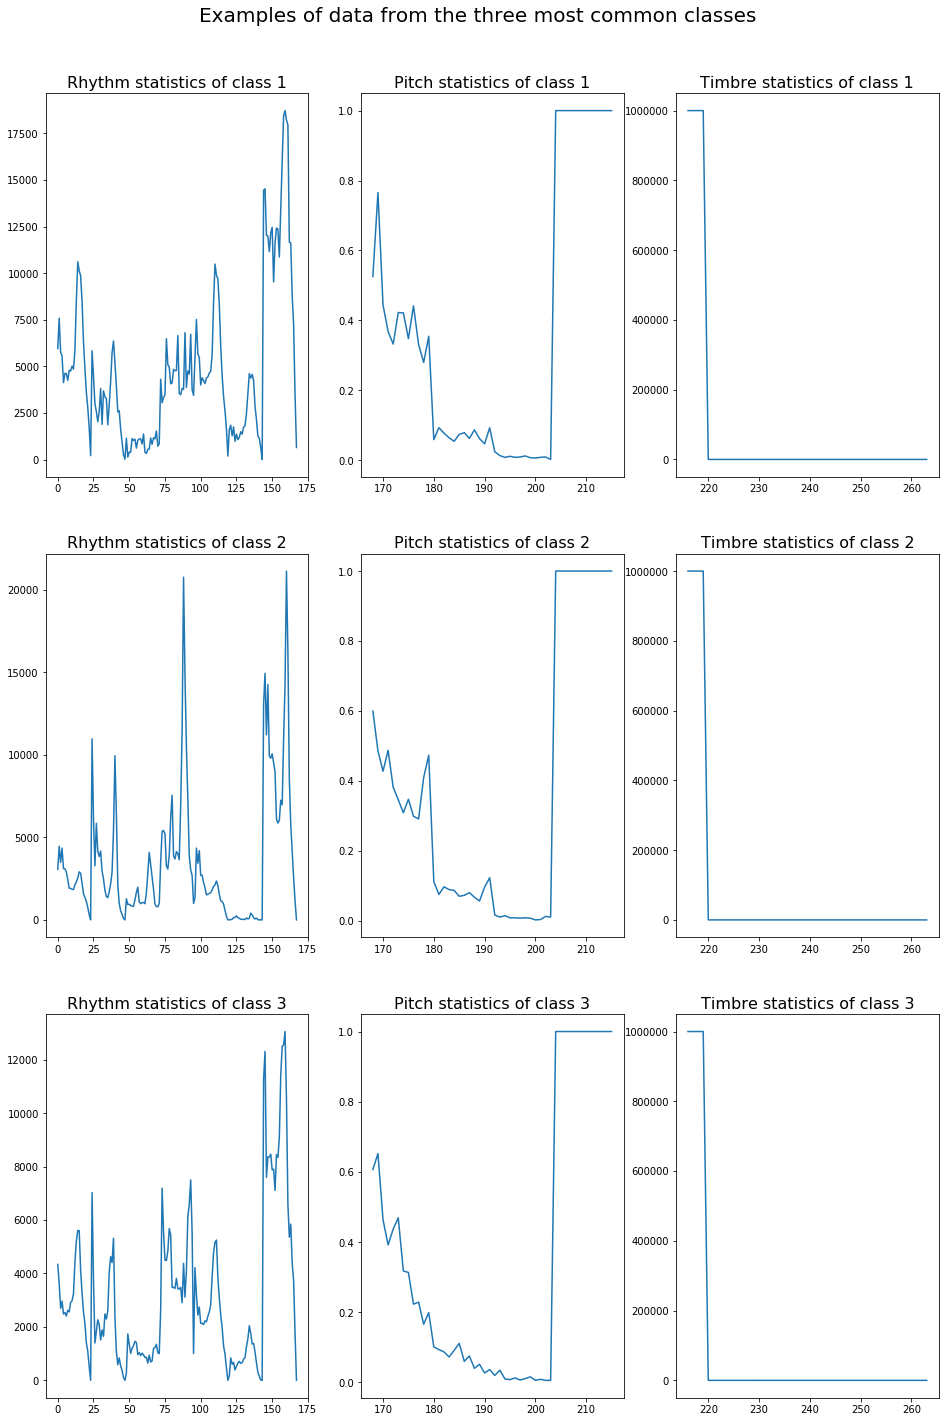

In [5]:
    rythm_range = np.arange(0,168) # Indexes from 0 to 167
    rythm = data[:,rythm_range]
    pitch_range = np.arange(168, 216)
    pitch = data[:, pitch_range]
    timbre_range = np.arange(216, 264)
    timbre = data[:, timbre_range]

    songs = np.asarray([10,2200,3659])
    iters = len(songs)

    fig = plt.figure(figsize=(16, 8*len(songs)))
    fig.suptitle('Examples of data from the three most common classes', fontsize=20, y=0.93)

    for i in range(iters):
        plt.subplot(iters,3,i*3+1)
        plt.plot(rythm_range, rythm[songs[i],:])
        plt.title("Rhythm statistics of class " + str(labels[songs[i],0]), fontsize=16)
        plt.subplot(iters,3,i*3+2)
        plt.plot(pitch_range, pitch[songs[i],:])
        plt.title("Pitch statistics of class " + str(labels[songs[i],0]), fontsize=16)
        plt.subplot(iters,3,i*3+3)
        plt.plot(timbre_range, timbre[songs[i],:])
        plt.title("Timbre statistics of class " + str(labels[songs[i],0]), fontsize=16)
    
    plt.subplots_adjust(hspace = 0.2)
    plt.show()

## 3. Methods and experiments

After trying a few different approaches, we decided to use a pure neural network approach. The model of our choise was fully connected neural network with four hidden layers, of sizes 88, 20, 14 and 6.  The sturcture is illustrated in figure 2. By that we mean no PCA or other unsupervised dimension reduction methods were used in the final implementation. However, we did normalize each feature by substracting the mean and dividing by the standard deviation.

![Neural network](https://raw.githubusercontent.com/MasaSip/mlbp-genre-classification/master/report/Neural_networks.jpeg)
*Figure 2. Illustration of neural network. The number of neurons and layers do no match with the actual architecture.*

The optimizer for the gradient descent we used was ADAM [[3](https://arxiv.org/abs/1412.6980)]. This had been working in our previous projects, and it's widely used in the field.

A very important part of the problem is to combat overfitting. The whole data set was only ~4300 data points with 264 input and 10 output dimensions. Our approach was to fine-tune the hyperparameters of the network with gradual steps to smaller validation data set size. The first starting point was 3300 train data points and 1000 validation data points - randomly chosen from the provided data set. Moreover, we didn't really concentrate on the training error and accuracy, but rather on the validation loss and accuracy.

There were three concrete measures that we took to counter overfitting: restricting the size of the hidden layers, adding dropout layers - ie. randomly dropping some of the inputs the next layer receives, as well as adjusting the batch size in the optimization process. We also tried different numbers of epochs, settling to about 800.

Moreover, we also experimented a bit with the activation and loss functions. Since the task was to minimize the log-loss, it being the best loss function was unsurprising. We also used softmax for the final activation, which turned (unsurprisingly) out to be a good choice: it always outputs a probability distribution. For the hidden layers, relu and alike functions turned out to be the best. In the final version we used a mixture its differentiable version softplus and elu, a relu with exponential asymptotic behaviour. Anyhow, nonsymmetric activation functions performed better than sigmoid.


## 4. Results

Despite the effort to avoid overfitting, train accuracy ended up always being a lot higher than validation loss. Depending on the hyperparameters, the train accuracy was between 0.7 and 0.95, while we only reached 0.685 accuracy for the validation accuracy. With really small validation sample sizes, we did occasionally get higher validation accuracies, but these were probably due to variance in sampling. A confusion matrix of validation data is presented in Figure 3.

![Confution matrix](https://github.com/MasaSip/mlbp-genre-classification/blob/master/report/confution_matrix.PNG?raw=true)
*Figure 3. Confusion matrix of validation set of 563 data points. The greates weakness is false positive prediction to class one.*

The dropout layers were very effective in countering overfitting. We got the best results with one layer with 0.5 probability of shutting down a given input, and another with 0.1 probability. We experimented with a lot of these values, and 0.45-0.7 was the best range for the first layer dropout probability. Below that, a lot of overfitting started to happen. Higher than that, and train loss didn't reach the highest values of validation loss that we had attained. The second dropout layer had a much smaller effect.

PCA was inferior to using a pure neural network strategy. This was tested with different numbers of output dimensions for PCA. Also normalization based on mean and standard deviation was superior to linearly normalizing with a minimum value of 0 and maximum value of 1. Without any normalization the adam optimizer was unable to move anywhere: the changes in loss were literally nonexistent.


All nonsymmetric activation functions we used performed largely similarly. While the mixture of softmax and elu did perform marginally better than the others, there was a much larger difference between these and the sigmoid activation function.

The results in validation accuracy and loss differed between runs. However, these differences didn't cause so much noise that the different approaches couldn't have been evaluated, but they clearly made them more vague. The result of an validation


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
from numpy import genfromtxt

trainsize = 4300
inputs = 264
genres = 10

#Confusion matrix ...
model = Sequential()
model.add(Dense(inputs // 3, input_dim=inputs, activation='softplus', bias_initializer='ones'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='elu', bias_initializer='ones'))
model.add(Dropout(0.1))
model.add(Dense(14, activation='softplus'))
model.add(Dense(6, activation='elu', bias_initializer='ones'))
model.add(Dense(genres, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# normalize data
def normalize(M):
    return (M - np.mean(M, axis=0) ) / (np.std(M, axis=0) + np.mean(M, axis=0)*0.0000001)

# read and shuffle data
X = genfromtxt('train_data.csv', delimiter=',')
X = normalize(X)

inputs = len(X[0])

Y_0 = genfromtxt('train_labels.csv', delimiter=',')
Y = np.zeros((Y_0.shape[0], genres))

numbers = np.arange(genres)
for i in range(Y_0.shape[0]):
    index = int(Y_0[i]) - 1
    numbers[index] += 1
    Y[i][index] = 1.0

# shuffle data
ind = np.arange(X.shape[0])
np.random.shuffle(ind)
X = X[ind]
Y = Y[ind]

# Split to train and verification data
X0 = X[:trainsize]
Y0 = Y[:trainsize]

X1 = X[trainsize:]
Y1 = Y[trainsize:]

# Fit model
# The epochs have been reduced to 20 in order to make this document more readable
# you can incrase it if you want to see how well it performs
model.fit(X0, Y0, epochs=20, batch_size=(trainsize // 2), verbose=1, validation_data=(X1, Y1))

def print_outputs():
    print("Outputs for the test data...")
    print("")
    Z = genfromtxt('test_data.csv', delimiter=',')
    Z = normalize(Z)

    logloss = model.predict(Z)
    print("logloss", logloss.shape, logloss)
    indices = np.repeat(np.arange(logloss.shape[0]) + 1, 1)
    gens = np.argmax(logloss, axis=1) + 1
    logloss = np.c_[indices, logloss]
    #np.savetxt("logloss_foo.csv", logloss, delimiter=",", fmt="%i,%1.8f,%1.8f,%1.8f,%1.8f,%1.8f,%1.8f,%1.8f,%1.8f,%1.8f,%1.8f")

    gens = np.stack((indices,gens)).T
    gens = gens.astype(int)
    print("genres", gens.shape, gens)
    #np.savetxt("genres_foo.csv", gens, delimiter=",", fmt="%i")

print_outputs()

Train on 4300 samples, validate on 63 samples
Epoch 1/20
4300/4300 [==============================] - 0s 112us/step - loss: 3.8040 - acc: 0.0453 - val_loss: 3.2478 - val_acc: 0.0635
Epoch 2/20
4300/4300 [==============================] - 0s 7us/step - loss: 3.4165 - acc: 0.0419 - val_loss: 2.8687 - val_acc: 0.0952
Epoch 3/20
4300/4300 [==============================] - 0s 7us/step - loss: 3.0615 - acc: 0.0465 - val_loss: 2.5896 - val_acc: 0.0952
Epoch 4/20
4300/4300 [==============================] - 0s 6us/step - loss: 2.8434 - acc: 0.0481 - val_loss: 2.3947 - val_acc: 0.1111
Epoch 5/20
4300/4300 [==============================] - 0s 7us/step - loss: 2.6390 - acc: 0.0530 - val_loss: 2.2637 - val_acc: 0.1270
Epoch 6/20
4300/4300 [==============================] - 0s 7us/step - loss: 2.5066 - acc: 0.0481 - val_loss: 2.1714 - val_acc: 0.1111
Epoch 7/20
4300/4300 [==============================] - 0s 7us/step - loss: 2.3831 - acc: 0.0530 - val_loss: 2.1027 - val_acc: 0.1111
Epoch 8/20
430

## 5. Discussion/Conclusions

To sum up, our key findings were that pure neural networks performed well for classification problem, PCA as a dimensional reduction did not improve the performance of our model, and that overfitting was well tackled with dropout. The good performance of neural networks was not surprising as it is in align with the latest research in machine learning. The neural networks have been shown to be applicable to both linear and non-linear problems. According to Ramachandran et al. [4], ReLU is currently the most popular activation function for deep learning. We did see it and its variants advantages in neural networks over the more traditional sigmoid-like functions.

The observation that PCA did not improve the performance of our model mainly showcases the non-linearity of the data. Shlens (2014) has explained that non-linearly distributed data, non-orthogonal axes, and non-Gaussian distributed data cause PCA to fail. [[5](https://arxiv.org/pdf/1404.1100.pdf?utm_content=bufferb37df&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer)] A graphical example of the shortages of PCA is provided in Appendix A. 
The performance of the solutions was evaluated both with the log loss and the accuracy. We see this as appropriate as the methods full fill each other.  of predictions. The log loss gives a more sophisticated view into the performance of a model compared to pure accuracy [2]. For example, log loss penalizes highly from giving a low probability to a genre that turned out to be correct.

Both log loss and accuracy were used as a performance measurement of the solution. These two methods complement each other and the use of log loss is reasoned as it better considers the uncertainty of results. Surprising in our solution was that the model performed much better in accuracy than log loss in comparison to other groups in the Kaggle competition.
For the future research, we suggest to study methods in dimensional reduction and removing redundancies in the dataset. For example, Hermite orthogonal polynomials could be used to reduce correlation in the data by reducing the number of variables. Furthermore, nonlinear methods such as IsoMap could be studied for the dimension reduction [[6](https://blog.paperspace.com/dimension-reduction-with-isomap/)]. All in all, the question of developing a predictor for genre class was able to be tackled using neural networks.



## 6. References

[1] Thierry Bertin-Mahieux, Daniel P.W. Ellis, Brian Whitman, and Paul Lamere. “The Million 
Song Dataset. In Proceedings of the 12th International Society for Music Information 
Retrieval Conference (ISMIR 2011)”, 2011. https://labrosa.ee.columbia.edu/millionsong/ 

[2] Log Loss - fast.ai http://wiki.fast.ai/index.php/Log_Loss

[3] Adam: A Method for Stochastic Optimization https://arxiv.org/abs/1412.6980

[4] Searching for Activation Functions https://arxiv.org/abs/1710.05941

[5] Shlens, J., 2014. A tutorial on principal component analysis. arXiv preprint arXiv:1404.1100. https://arxiv.org/pdf/1404.1100.pdf?utm_content=bufferb37df&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer

[6] Dimension Reduction - IsoMap https://blog.paperspace.com/dimension-reduction-with-isomap/ 


## Appendix


### A
![the shortages of PCA](https://github.com/MasaSip/mlbp-genre-classification/blob/master/report/PCA_linear_vs_non_linear.PNG?raw=true)
*Figure 3. PCA fails for non-linearly distributed data, non-orthogonal axes, and non-Gaussian distributed data [[5](https://arxiv.org/pdf/1404.1100.pdf?utm_content=bufferb37df&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer)].*